In [1]:
import pandas as pd

In [52]:
dga = pd.read_csv('DGA_예선_학습데이터.csv')

In [3]:
dga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   domain  1600000 non-null  object
 1   dga     1600000 non-null  object
 2   class   1600000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

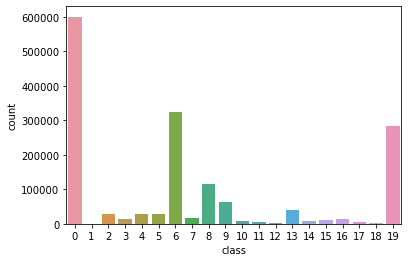

In [5]:
sns.countplot(x='class', data =dga)

In [6]:
for i in range(0,5):
    print(i)
    globals()['temp_{}'.format(i)] = i

0
1
2
3
4


In [7]:
temp_0

0

In [8]:
for i in range(0,20):
    globals()['dga_{}'.format(i)] = dga[dga['class'] == i]

In [9]:
dga_0

,domain,dga,class
2,smartidpro.in,no,0
11,extranet-altone.fr,no,0
15,math-shortcut-tricks.com,no,0
16,realher.com,no,0
18,kingkoil.com.sg,no,0
...,...,...,...
1599981,saltodoceu.mt.gov.br,no,0
1599982,az.gov,no,0
1599989,adella.ru,no,0
1599994,seikei.ac.jp,no,0


In [10]:
dga_16

,domain,dga,class
12,destroycorner.net,yes,16
83,christinajeremiah.net,yes,16
234,threetell.net,yes,16
388,degreebeing.net,yes,16
412,noneshine.net,yes,16
...,...,...,...
1599184,ermintrudeboniface.net,yes,16
1599540,triesagree.ru,yes,16
1599717,fallloss.ru,yes,16
1599806,saidother.net,yes,16


도메인을 분리해보는 것이 좋다 (.)을 기준으로 나누는 것 

In [11]:
from tld import get_tld

In [12]:
url_1 = 'http://' + 'smartidpro.in'

In [13]:
top_domain = get_tld(url_1)

In [14]:
top_domain

'in'

In [15]:
type(top_domain)

str

In [16]:
top_domain_1 = get_tld(url_1, as_object = True)

In [17]:
top_domain_1

in

In [18]:
def topDomain(domain):
    try:
        top = get_tld('http://' + domain)
    except:
        print('topDomain Error!\n',domain)
    return top

In [19]:
a = 'asdkfjlasdf.biz'
topDomain(a)

'biz'

In [20]:
top_list = [] # topdomain 담기 위한 리스트 생성

for index, value in dga_1.iterrows(): # 차례로 뽑아주는 것 
    #print(index)
    #print(value)
    domain = value[0] # value 값의 0번째 
    #print(domain)
    top = topDomain(domain)
    top_list.append(top)
    
dga_1.insert(1,'top_domain', top_list, allow_duplicates = True)

In [21]:
dga_1

,domain,top_domain,dga,class
257,b6427368140624515a0ee4c29d27b789.info,info,yes,1
800,6e3772dd01644a88e16b0dbe2a6c0d36.org,org,yes,1
1731,1c7fadd66c9fbb16cd1dcd38d743f263.org,org,yes,1
4462,773683efbacb0bb70b75322c7e4662b9.info,info,yes,1
5435,4a51234e6e87c3c793592df62508a7d4.info,info,yes,1
...,...,...,...,...
1589137,7a7e47b55b0162d673231eb87881b07a.org,org,yes,1
1590363,7f200216723deebc7c91b324fc0962ad.org,org,yes,1
1594675,ed6cd7bcc51974b2a76909b46c3c8696.org,org,yes,1
1596475,d86e4bd4f58b94de0cbf326ac4be7087.org,org,yes,1


데이터 프레임에 추가하는 함수 만들기

In [37]:
def add_dataframe(dataframe, function, col_name):
    temp_list = []
    
    for index, value in dataframe.iterrows():
        domain = value[0]
        
        temp = function(domain)
        temp_list.append(temp)
        
    dataframe.insert(1, col_name, temp_list, allow_duplicates = True)

In [53]:
add_dataframe(dga, topDomain, 'top_domain')

In [39]:
dga

,domain,in,in,<function topDomain at 0x000002729532E700>,dga,class
0,vsviqe.com,com,com,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,org,org,org,yes,6
2,smartidpro.in,in,in,in,no,0
3,9mtrkmet8rjnpya4.ru,ru,ru,ru,yes,2
4,ypyxhi.com,com,com,com,yes,19
...,...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,net,net,net,yes,6
1599996,acheemprego.com,com,com,com,no,0
1599997,dtvvqs.com,com,com,com,yes,19
1599998,qurtpwncfwhjke.pw,pw,pw,pw,yes,7


---

서브도메인 찾기add_dataframe

In [40]:
dga_1

,domain,top_domain,dga,class
257,b6427368140624515a0ee4c29d27b789.info,info,yes,1
800,6e3772dd01644a88e16b0dbe2a6c0d36.org,org,yes,1
1731,1c7fadd66c9fbb16cd1dcd38d743f263.org,org,yes,1
4462,773683efbacb0bb70b75322c7e4662b9.info,info,yes,1
5435,4a51234e6e87c3c793592df62508a7d4.info,info,yes,1
...,...,...,...,...
1589137,7a7e47b55b0162d673231eb87881b07a.org,org,yes,1
1590363,7f200216723deebc7c91b324fc0962ad.org,org,yes,1
1594675,ed6cd7bcc51974b2a76909b46c3c8696.org,org,yes,1
1596475,d86e4bd4f58b94de0cbf326ac4be7087.org,org,yes,1


In [63]:
dga_1_domain = 'b6427368140624515a0ee4c29d27b789.info'

In [42]:
dga_1_top = topDomain(dga_1_domain)

In [43]:
dga_1_top

'info'

In [44]:
dga_1_sub = dga_1_domain.replace('.' + dga_1_top,'')

In [45]:
dga_1_sub

'b6427368140624515a0ee4c29d27b789'

In [47]:
def subDomain(domain):
    top = topDomain(domain)
    sub = domain.replace('.'+str(top),'')
    return(sub)

In [48]:
subDomain('google.com')

'google'

In [54]:
add_dataframe(dga, subDomain, 'sub_domain')

In [55]:
dga

,domain,sub_domain,top_domain,dga,class
0,vsviqe.com,vsviqe,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,170qknj1onn4c37qf1w71rzei1h,org,yes,6
2,smartidpro.in,smartidpro,in,no,0
3,9mtrkmet8rjnpya4.ru,9mtrkmet8rjnpya4,ru,yes,2
4,ypyxhi.com,ypyxhi,com,yes,19
...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,10zpd8p1ktb8bg1al07c3rfkuqw,net,yes,6
1599996,acheemprego.com,acheemprego,com,no,0
1599997,dtvvqs.com,dtvvqs,com,yes,19
1599998,qurtpwncfwhjke.pw,qurtpwncfwhjke,pw,yes,7


----

In [57]:
len(dga_1_sub)

32

In [58]:
def subLength(domain):
    dga_sub = subDomain(domain)
    length = len(dga_sub)
    return length

In [59]:
subLength('google.com')

6

In [60]:
add_dataframe(dga, subLength, 'sub_length')

In [61]:
dga

,domain,sub_length,sub_domain,top_domain,dga,class
0,vsviqe.com,6,vsviqe,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,27,170qknj1onn4c37qf1w71rzei1h,org,yes,6
2,smartidpro.in,10,smartidpro,in,no,0
3,9mtrkmet8rjnpya4.ru,16,9mtrkmet8rjnpya4,ru,yes,2
4,ypyxhi.com,6,ypyxhi,com,yes,19
...,...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,27,10zpd8p1ktb8bg1al07c3rfkuqw,net,yes,6
1599996,acheemprego.com,11,acheemprego,com,no,0
1599997,dtvvqs.com,6,dtvvqs,com,yes,19
1599998,qurtpwncfwhjke.pw,14,qurtpwncfwhjke,pw,yes,7


---

In [62]:
import matplotlib.pyplot as plt

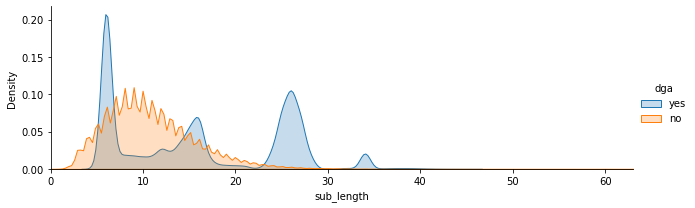

In [66]:
facet = sns.FacetGrid(dga, hue = 'dga', aspect = 3)
facet.map(sns.kdeplot, 'sub_length', shade = True)
facet.set(xlim=(0,dga['sub_length'].max()))
facet.add_legend()
plt.show()

In [70]:
dga[dga['class'] == 1]['top_domain'].unique()

array(['info', 'org'], dtype=object)

In [72]:
dga[dga['class'] == 0]['top_domain'].unique()

array(['in', 'fr', 'com', ..., 'ltda', 'cieszyn.pl', 'we.bs'],
      dtype=object)

---

자음 배열 찾기 (3개 이상)

In [87]:
dga2 = dga[dga['class'] == 2]

In [92]:
dga2 = dga2['sub_domain']

자음 : bcdfghjklmnpqrstvwxyz

In [76]:
import re

In [77]:
pattern = re.compile(r'[bcdfghjklmnpqrstvwxyz]{3,}')

In [106]:
def is_con(domain):
    sub = subDomain(domain)
    pattern = re.compile(r'[bcdfghjklmnpqrstvwxyz]{3,}')
    match = pattern.findall(sub)
    
    return(len(match))

In [107]:
is_con('navvvvvvvvvvvver.com')

1

In [108]:
add_dataframe(dga, is_con, 'is_con')

In [109]:
dga

,domain,is_con,sub_length,sub_domain,top_domain,dga,class
0,vsviqe.com,1,6,vsviqe,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,1,27,170qknj1onn4c37qf1w71rzei1h,org,yes,6
2,smartidpro.in,1,10,smartidpro,in,no,0
3,9mtrkmet8rjnpya4.ru,2,16,9mtrkmet8rjnpya4,ru,yes,2
4,ypyxhi.com,1,6,ypyxhi,com,yes,19
...,...,...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,3,27,10zpd8p1ktb8bg1al07c3rfkuqw,net,yes,6
1599996,acheemprego.com,1,11,acheemprego,com,no,0
1599997,dtvvqs.com,1,6,dtvvqs,com,yes,19
1599998,qurtpwncfwhjke.pw,1,14,qurtpwncfwhjke,pw,yes,7


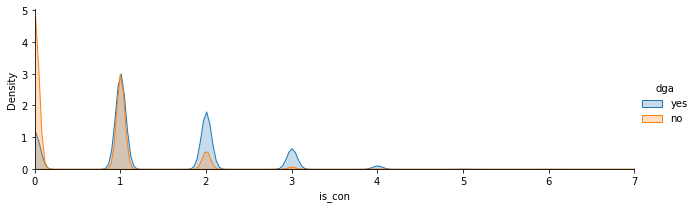

In [110]:
facet = sns.FacetGrid(dga, hue = 'dga', aspect = 3)
facet.map(sns.kdeplot, 'is_con', shade = True)
facet.set(xlim=(0,dga['is_con'].max()))
facet.add_legend()
plt.show()

---

자음과 모음의 비율 찾기

자음 : bcdfghjklmnpqrstvwxyz  
모음 : aeiou

In [114]:
dga_1 = dga[dga['class']==1]

In [115]:
dga_1

,domain,is_con,sub_length,sub_domain,top_domain,dga,class
257,b6427368140624515a0ee4c29d27b789.info,0,32,b6427368140624515a0ee4c29d27b789,info,yes,1
800,6e3772dd01644a88e16b0dbe2a6c0d36.org,0,32,6e3772dd01644a88e16b0dbe2a6c0d36,org,yes,1
1731,1c7fadd66c9fbb16cd1dcd38d743f263.org,2,32,1c7fadd66c9fbb16cd1dcd38d743f263,org,yes,1
4462,773683efbacb0bb70b75322c7e4662b9.info,0,32,773683efbacb0bb70b75322c7e4662b9,info,yes,1
5435,4a51234e6e87c3c793592df62508a7d4.info,0,32,4a51234e6e87c3c793592df62508a7d4,info,yes,1
...,...,...,...,...,...,...,...
1589137,7a7e47b55b0162d673231eb87881b07a.org,0,32,7a7e47b55b0162d673231eb87881b07a,org,yes,1
1590363,7f200216723deebc7c91b324fc0962ad.org,0,32,7f200216723deebc7c91b324fc0962ad,org,yes,1
1594675,ed6cd7bcc51974b2a76909b46c3c8696.org,1,32,ed6cd7bcc51974b2a76909b46c3c8696,org,yes,1
1596475,d86e4bd4f58b94de0cbf326ac4be7087.org,1,32,d86e4bd4f58b94de0cbf326ac4be7087,org,yes,1


In [116]:
dga_1_domain = 'b6427368140624515a0ee4c29d27b789.info'

In [117]:
dga_1_sub = subDomain(dga_1_domain)

In [122]:
dga_1_sub

'b6427368140624515a0ee4c29d27b789'

In [125]:
pattern_con = re.compile(r'[bcdfghjklmnpqrstvwxyz]')
pattern_vow = re.compile(r'[aeiou]')
match_con = pattern_con.findall(dga_1_sub)
match_vow = pattern_vow.findall(dga_1_sub)

In [126]:
match_con

['b', 'c', 'd', 'b']

In [127]:
match_vow

['a', 'e', 'e']

In [128]:
len(match_con) / subLength(dga_1_domain)

0.125

In [129]:
len(match_vow) / subLength(dga_1_domain)

0.09375

In [135]:
def rate_cons(domain):
    sub = subDomain(domain)
    pattern_con = re.compile(r'[bcdfghjklmnpqrstvwxyz]')
    match_con = pattern_con.findall(sub)
    rate = round(len(match_con) / len(sub), 5)
    return rate

In [140]:
def rate_vows(domain):
    sub = subDomain(domain)
    pattern_vow = re.compile(r'[aeiou]')
    match_vow = pattern_vow.findall(sub)
    rate = round(len(match_vow) / len(sub), 5)
    return rate

In [138]:
add_dataframe(dga, rate_cons, 'rate_cons')

In [141]:
add_dataframe(dga, rate_vows, 'rate_vows')

In [142]:
dga

,domain,rate_vows,rate_cons,is_con,sub_length,sub_domain,top_domain,dga,class
0,vsviqe.com,0.33333,0.66667,1,6,vsviqe,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,0.11111,0.48148,1,27,170qknj1onn4c37qf1w71rzei1h,org,yes,6
2,smartidpro.in,0.30000,0.70000,1,10,smartidpro,in,no,0
3,9mtrkmet8rjnpya4.ru,0.12500,0.68750,2,16,9mtrkmet8rjnpya4,ru,yes,2
4,ypyxhi.com,0.16667,0.83333,1,6,ypyxhi,com,yes,19
...,...,...,...,...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,0.07407,0.59259,3,27,10zpd8p1ktb8bg1al07c3rfkuqw,net,yes,6
1599996,acheemprego.com,0.45455,0.54545,1,11,acheemprego,com,no,0
1599997,dtvvqs.com,0.00000,1.00000,1,6,dtvvqs,com,yes,19
1599998,qurtpwncfwhjke.pw,0.14286,0.85714,1,14,qurtpwncfwhjke,pw,yes,7


-----

숫자의 분포 찾기

In [143]:
dga_1_domain = 'b6427368140624515a0ee4c29d27b789.info'

In [144]:
dga_1_sub = subDomain(dga_1_domain)

In [145]:
dga_1_sub 

'b6427368140624515a0ee4c29d27b789'

In [150]:
pattern_num = re.compile('[0-9]{1,}')

In [151]:
match_num = pattern_num.findall(dga_1_sub)

In [152]:
match_num

['6427368140624515', '0', '4', '29', '27', '789']

In [153]:
def dist_num(domain):
    sub = subDomain(domain)
    pattern_num = re.compile('[0-9]{1,}')
    match_num = pattern_num.findall(sub)
    
    return len(match_num)

In [157]:
add_dataframe(dga, dist_num, 'dist_num')

In [158]:
dga

,domain,dist_num,rate_vows,rate_cons,is_con,sub_length,sub_domain,top_domain,dga,class
0,vsviqe.com,0,0.33333,0.66667,1,6,vsviqe,com,yes,19
1,170qknj1onn4c37qf1w71rzei1h.org,7,0.11111,0.48148,1,27,170qknj1onn4c37qf1w71rzei1h,org,yes,6
2,smartidpro.in,0,0.30000,0.70000,1,10,smartidpro,in,no,0
3,9mtrkmet8rjnpya4.ru,3,0.12500,0.68750,2,16,9mtrkmet8rjnpya4,ru,yes,2
4,ypyxhi.com,0,0.16667,0.83333,1,6,ypyxhi,com,yes,19
...,...,...,...,...,...,...,...,...,...,...
1599995,10zpd8p1ktb8bg1al07c3rfkuqw.net,7,0.07407,0.59259,3,27,10zpd8p1ktb8bg1al07c3rfkuqw,net,yes,6
1599996,acheemprego.com,0,0.45455,0.54545,1,11,acheemprego,com,no,0
1599997,dtvvqs.com,0,0.00000,1.00000,1,6,dtvvqs,com,yes,19
1599998,qurtpwncfwhjke.pw,0,0.14286,0.85714,1,14,qurtpwncfwhjke,pw,yes,7


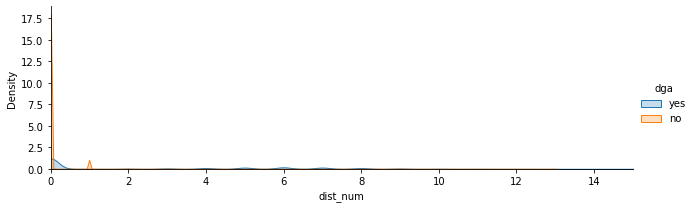

In [159]:
facet = sns.FacetGrid(dga, hue = 'dga', aspect = 3)
facet.map(sns.kdeplot, 'dist_num', shade = True)
facet.set(xlim=(0,dga['dist_num'].max()))
facet.add_legend()
plt.show()

---

ngram 찾기

In [ ]:
1gram = {g:2, o:2, l:1, e:1}
2gram = {go:1, oo:1, og:1, gl:1, le:1}
3gram = {goo:1, oog:1, ogl:1, gle:1}
4gram = {goog:1, oogl:1, ogle:1}

In [160]:
dga_0

,domain,dga,class
2,smartidpro.in,no,0
11,extranet-altone.fr,no,0
15,math-shortcut-tricks.com,no,0
16,realher.com,no,0
18,kingkoil.com.sg,no,0
...,...,...,...
1599981,saltodoceu.mt.gov.br,no,0
1599982,az.gov,no,0
1599989,adella.ru,no,0
1599994,seikei.ac.jp,no,0


In [161]:
dga_0_domain = 'smartidpro.in'

In [162]:
dga_0_sub = subDomain(dga_0_domain)

In [163]:
dga_0_sub

'smartidpro'

In [164]:
gram_list=[]

if len(dga_0_sub) < 3: #3그램하려고 3 넣은 거임
    pass
else:
    for sp in range(len(dga_0_sub) - (3-1)):
        gram_list.append(dga_0_sub[sp:sp+3])
        
gram_list

['sma', 'mar', 'art', 'rti', 'tid', 'idp', 'dpr', 'pro']

In [170]:
def ngram(domain, number):
    sub = subDomain(domain)
    gram_list = []
    if len(sub) < number:
        pass
    else:
        for sp in range(len(sub)-(number-1)):
            gram_list.append(sub[sp:sp+number])
    return gram_list


In [183]:
def make_ngram_dict(dataframe, number):
    freqdict = {}
    domain_list = dataframe['domain'].tolist()
    for domain in domain_list:
        ngrams = ngram(domain, number)
        for gram in ngrams:
            if gram in freqdict:
                freqdict[gram] += 1
            else:
                freqdict[gram] = 1
    with open(str(number)+'_gram_dict.pkl', 'wb') as f:
        pickle.dump(freqdict, f, pickle.HIGHEST_PROTOCOL)
    f.close()
#    return freqdict


In [175]:
make_ngram_dict(dga_1, 3)

{'b64': 13,
 '642': 11,
 '427': 5,
 '273': 8,
 '736': 8,
 '368': 10,
 '681': 7,
 '814': 9,
 '140': 5,
 '406': 6,
 '062': 3,
 '624': 7,
 '245': 11,
 '451': 4,
 '515': 5,
 '15a': 8,
 '5a0': 7,
 'a0e': 5,
 '0ee': 4,
 'ee4': 8,
 'e4c': 4,
 '4c2': 4,
 'c29': 8,
 '29d': 6,
 '9d2': 10,
 'd27': 6,
 '27b': 7,
 '7b7': 4,
 'b78': 8,
 '789': 4,
 '6e3': 5,
 'e37': 7,
 '377': 8,
 '772': 8,
 '72d': 11,
 '2dd': 6,
 'dd0': 5,
 'd01': 4,
 '016': 8,
 '164': 8,
 '644': 6,
 '44a': 6,
 '4a8': 2,
 'a88': 7,
 '88e': 6,
 '8e1': 8,
 'e16': 4,
 '16b': 5,
 '6b0': 5,
 'b0d': 8,
 '0db': 6,
 'dbe': 9,
 'be2': 6,
 'e2a': 3,
 '2a6': 6,
 'a6c': 5,
 '6c0': 3,
 'c0d': 3,
 '0d3': 4,
 'd36': 4,
 '1c7': 7,
 'c7f': 6,
 '7fa': 10,
 'fad': 9,
 'add': 8,
 'dd6': 6,
 'd66': 5,
 '66c': 5,
 '6c9': 8,
 'c9f': 6,
 '9fb': 2,
 'fbb': 4,
 'bb1': 8,
 'b16': 6,
 '16c': 6,
 '6cd': 6,
 'cd1': 9,
 'd1d': 4,
 '1dc': 9,
 'dcd': 9,
 'cd3': 6,
 'd38': 8,
 '38d': 4,
 '8d7': 4,
 'd74': 4,
 '743': 5,
 '43f': 6,
 '3f2': 6,
 'f26': 6,
 '263': 10,
 '

In [176]:
import pickle

In [180]:
make_ngram_dict(dga_0, 1)
make_ngram_dict(dga_0, 3)
make_ngram_dict(dga_0, 4)
make_ngram_dict(dga_0, 5)

{'smart': 1250,
 'marti': 291,
 'artid': 18,
 'rtidp': 1,
 'tidpr': 1,
 'idpro': 21,
 'extra': 219,
 'xtran': 26,
 'trane': 53,
 'ranet': 79,
 'anet-': 27,
 'net-a': 13,
 'et-al': 9,
 't-alt': 3,
 '-alto': 4,
 'alton': 59,
 'ltone': 10,
 'math-': 13,
 'ath-s': 2,
 'th-sh': 3,
 'h-sho': 18,
 '-shor': 9,
 'short': 163,
 'hortc': 17,
 'ortcu': 15,
 'rtcut': 16,
 'tcut-': 1,
 'cut-t': 2,
 'ut-tr': 4,
 't-tri': 5,
 '-tric': 13,
 'trick': 235,
 'ricks': 215,
 'realh': 21,
 'ealhe': 8,
 'alher': 16,
 'kingk': 16,
 'ingko': 13,
 'ngkoi': 2,
 'gkoil': 1,
 'error': 48,
 'rror-': 5,
 'ror-6': 1,
 'or-64': 1,
 'thewe': 96,
 'hewes': 15,
 'ewest': 50,
 'weste': 166,
 'ester': 533,
 'sterf': 48,
 'terfi': 53,
 'erfie': 26,
 'rfiel': 60,
 'field': 481,
 'ieldg': 22,
 'eldgr': 8,
 'ldgro': 19,
 'dgrou': 90,
 'group': 2492,
 'drive': 642,
 'river': 654,
 'ivers': 986,
 'verse': 307,
 'ersed': 34,
 'rsedd': 1,
 'seddi': 3,
 'eddir': 6,
 'ddire': 26,
 'direc': 1321,
 'irect': 1310,
 'recta': 41,
 'ectan'

In [181]:
with open('5_gram_dict.pkl', 'rb') as f:
    gram5 = pickle.load(f)
f.close()

In [182]:
gram5

{'smart': 1250,
 'marti': 291,
 'artid': 18,
 'rtidp': 1,
 'tidpr': 1,
 'idpro': 21,
 'extra': 219,
 'xtran': 26,
 'trane': 53,
 'ranet': 79,
 'anet-': 27,
 'net-a': 13,
 'et-al': 9,
 't-alt': 3,
 '-alto': 4,
 'alton': 59,
 'ltone': 10,
 'math-': 13,
 'ath-s': 2,
 'th-sh': 3,
 'h-sho': 18,
 '-shor': 9,
 'short': 163,
 'hortc': 17,
 'ortcu': 15,
 'rtcut': 16,
 'tcut-': 1,
 'cut-t': 2,
 'ut-tr': 4,
 't-tri': 5,
 '-tric': 13,
 'trick': 235,
 'ricks': 215,
 'realh': 21,
 'ealhe': 8,
 'alher': 16,
 'kingk': 16,
 'ingko': 13,
 'ngkoi': 2,
 'gkoil': 1,
 'error': 48,
 'rror-': 5,
 'ror-6': 1,
 'or-64': 1,
 'thewe': 96,
 'hewes': 15,
 'ewest': 50,
 'weste': 166,
 'ester': 533,
 'sterf': 48,
 'terfi': 53,
 'erfie': 26,
 'rfiel': 60,
 'field': 481,
 'ieldg': 22,
 'eldgr': 8,
 'ldgro': 19,
 'dgrou': 90,
 'group': 2492,
 'drive': 642,
 'river': 654,
 'ivers': 986,
 'verse': 307,
 'ersed': 34,
 'rsedd': 1,
 'seddi': 3,
 'eddir': 6,
 'ddire': 26,
 'direc': 1321,
 'irect': 1310,
 'recta': 41,
 'ectan'

In [185]:
dga_1

,domain,is_con,sub_length,sub_domain,top_domain,dga,class
257,b6427368140624515a0ee4c29d27b789.info,0,32,b6427368140624515a0ee4c29d27b789,info,yes,1
800,6e3772dd01644a88e16b0dbe2a6c0d36.org,0,32,6e3772dd01644a88e16b0dbe2a6c0d36,org,yes,1
1731,1c7fadd66c9fbb16cd1dcd38d743f263.org,2,32,1c7fadd66c9fbb16cd1dcd38d743f263,org,yes,1
4462,773683efbacb0bb70b75322c7e4662b9.info,0,32,773683efbacb0bb70b75322c7e4662b9,info,yes,1
5435,4a51234e6e87c3c793592df62508a7d4.info,0,32,4a51234e6e87c3c793592df62508a7d4,info,yes,1
...,...,...,...,...,...,...,...
1589137,7a7e47b55b0162d673231eb87881b07a.org,0,32,7a7e47b55b0162d673231eb87881b07a,org,yes,1
1590363,7f200216723deebc7c91b324fc0962ad.org,0,32,7f200216723deebc7c91b324fc0962ad,org,yes,1
1594675,ed6cd7bcc51974b2a76909b46c3c8696.org,1,32,ed6cd7bcc51974b2a76909b46c3c8696,org,yes,1
1596475,d86e4bd4f58b94de0cbf326ac4be7087.org,1,32,d86e4bd4f58b94de0cbf326ac4be7087,org,yes,1


In [193]:
dga_1_domain = 'youtube.com'

In [194]:
dga_1_ngram = ngram(dga_1_domain, 3)

In [195]:
dga_1_ngram

['you', 'out', 'utu', 'tub', 'ube']

In [190]:
with open('3_gram_dict.pkl', 'rb') as f:
        gram3 = pickle.load(f)
        
    

In [196]:
total_score = 0 
    
for gram in dga_1_ngram:
    try:
        score = gram3[gram]
    except:
        score = 0
    total_score += score
    

In [197]:
total_score

10069

In [209]:
with open('1_gram_dict.pkl', 'rb') as f:
        gram1 = pickle.load(f)
f.close()

In [210]:
with open('3_gram_dict.pkl', 'rb') as f:
        gram3 = pickle.load(f)
f.close()

In [211]:
with open('4_gram_dict.pkl', 'rb') as f:
        gram4 = pickle.load(f)
f.close()

In [212]:
with open('5_gram_dict.pkl', 'rb') as f:
        gram5 = pickle.load(f)
f.close()

In [208]:
def ngram_score(domain, number, dict_name):
    ngrams = ngram(domain, number)
    
    total_score = 0 
    score = 0
    
    for gram in ngrams:
        try:
            score = dict_name[gram]
        except:
            score = 0
        total_score += score
    
    return total_score
    

In [213]:
ngram_score(domain, 3, gram3)

229

In [215]:
def add_dataframe(dataframe, function, col_name, number=0, dictionary=0):
    temp_list = []
    
    for index, value in dataframe.iterrows():
        domain = value[0]
        # 일반적 상황일 때
        if number == 0:
            temp = function(domain)
            temp_list.append(temp)
        #ngram 사용할 때 
        else:
            temp= function(domain, number, dictionary)
            temp_list.append(temp)
    dataframe.insert(1, col_name, temp_list, allow_duplicates = True)

In [216]:
add_dataframe(dga, ngram_score, 'ngram_score', 3, gram3)

In [219]:
add_dataframe(dga, ngram_score, 'ngram_score', 4, gram4)

In [220]:
add_dataframe(dga, ngram_score, 'ngram_score', 5, gram5)

In [222]:
total_prob = sum(gram1.values())

In [223]:
for key, value in gram1.items():
    gram1[key] = round(value/total_prob,7)

In [224]:
with open('probability.pkl', 'wb') as f:
    pickle.dump(gram1, f, pickle.HIGHEST_PROTOCOL)
f.close()

In [226]:
with open('probability.pkl','rb') as f:
    probability = pickle.load(f)

In [227]:
def relative_entropy(domain):
    entropy = 0
    
    sub = subDomain(domain)
    length = len(sub)
    cnt = Counter(sub_domain)
    entropy_list = []
    for key, value in cnt.items():
        obs = value / length
        exp = probability[key]
        entropy += obs * math.log((obs/exp),2)
    return entropy

In [228]:
import math